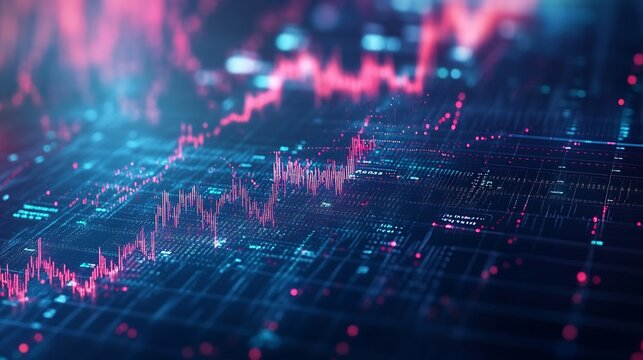

# Time Series Practice Dataset

### Overview

This dataset contains simulated time series data covering 10 years (2010-2019). The features include date, store id, product id and number sold. The train.csv covers the years 2010-2018 and the test.csv covers 2019 only. There are 7 unique stores and 10 unique products. There are no null values. The objective is to predict the number sold feature in the test file.

Data source: https://www.kaggle.com/datasets/samuelcortinhas/time-series-practice-dataset

Based on Deep Learning criteria, this notebook is developed by 3 main parts:

* Data loading and analysis

* Dataset creation

* Modeling and evaluation

___________________________

## Part 1 

### Data loading and analysis

In [3]:
# Import necessaries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from tensorflow.keras.models import Sequential , save_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import MAE , MAPE

Train set analysis:

In [4]:
# Create a function in order to read a csv file path and convert it to data frame
def Read_file(path):
    file = pd.read_csv(path)
    return file.copy()

In [5]:
# Load the train file
try:
    df = Read_file('train.csv')
except Exception : 
    print('Something went wrong when reading the train.csv file!')

In [6]:
df.head(10)

,Date,store,product,number_sold
0,2010-01-01,0,0,801
1,2010-01-02,0,0,810
2,2010-01-03,0,0,818
3,2010-01-04,0,0,796
4,2010-01-05,0,0,808
5,2010-01-06,0,0,812
6,2010-01-07,0,0,830
7,2010-01-08,0,0,812
8,2010-01-09,0,0,817
9,2010-01-10,0,0,832


In [7]:
df.tail(10)

,Date,store,product,number_sold
230080,2018-12-22,6,9,931
230081,2018-12-23,6,9,911
230082,2018-12-24,6,9,893
230083,2018-12-25,6,9,888
230084,2018-12-26,6,9,896
230085,2018-12-27,6,9,890
230086,2018-12-28,6,9,892
230087,2018-12-29,6,9,895
230088,2018-12-30,6,9,899
230089,2018-12-31,6,9,912


It seems data is daily and already sorted

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230090 entries, 0 to 230089
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Date         230090 non-null  object
 1   store        230090 non-null  int64 
 2   product      230090 non-null  int64 
 3   number_sold  230090 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.0+ MB


In [9]:
df.describe()

,store,product,number_sold
count,230090.000000,230090.000000,230090.000000
mean,3.000000,4.500000,780.926107
std,2.000004,2.872288,204.096737
min,0.000000,0.000000,238.000000
25%,1.000000,2.000000,722.000000
50%,3.000000,4.500000,835.000000
75%,5.000000,7.000000,914.000000
max,6.000000,9.000000,1205.000000


In [10]:
df.isnull().sum() # Total number of null values

Date           0
store          0
product        0
number_sold    0
dtype: int64

In [11]:
df.duplicated().sum() # Total number of duplicated values

0

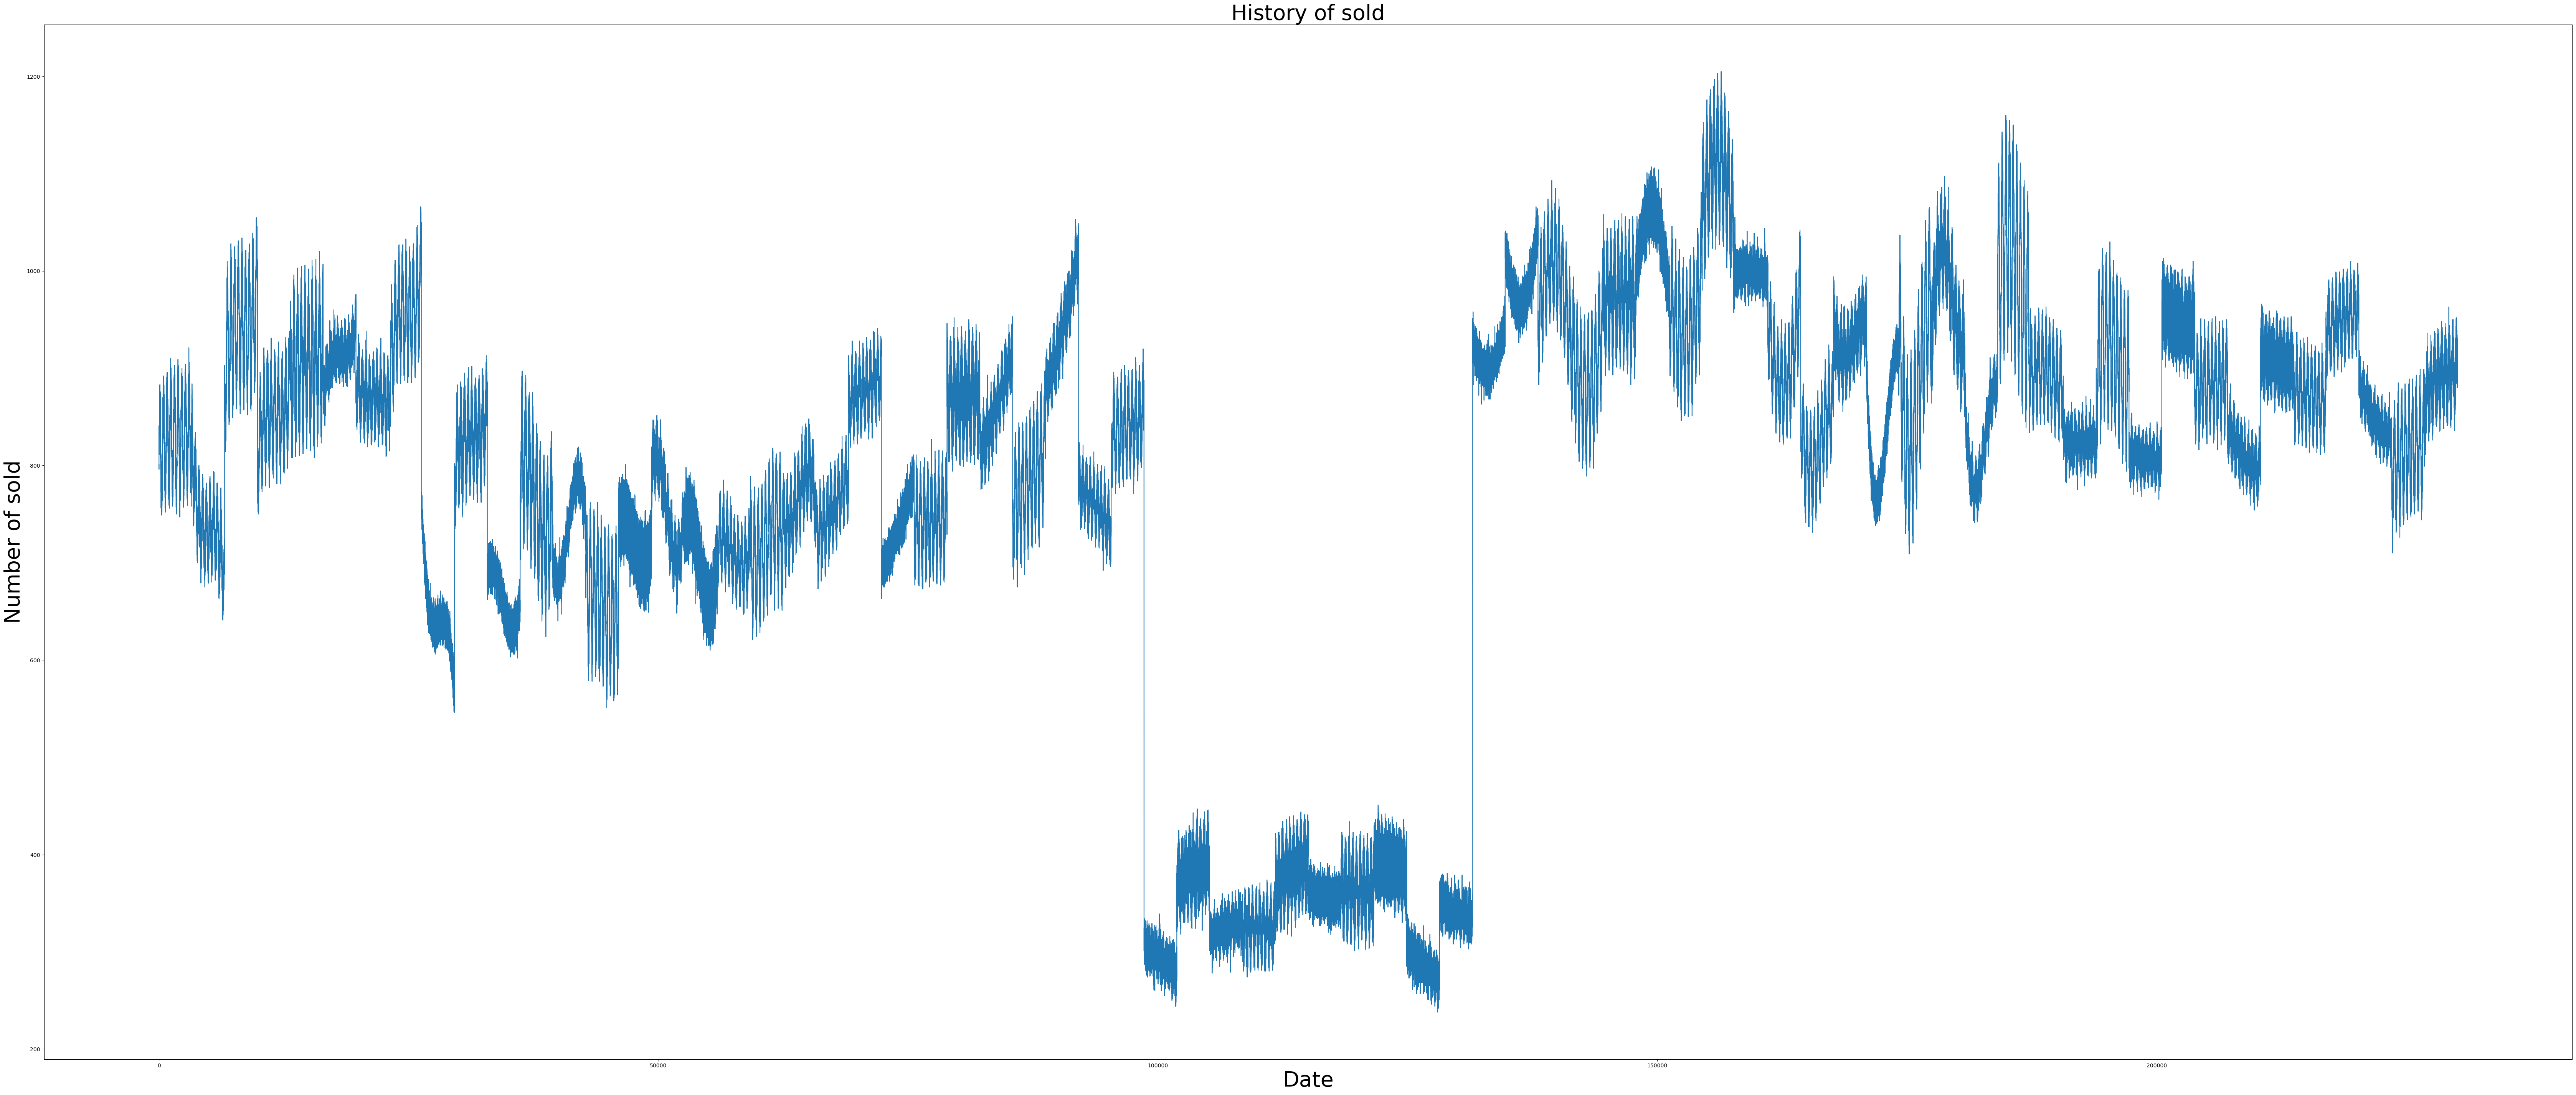

In [12]:
plt.figure(figsize=(85,35))
plt.plot(range(len(df)),df.number_sold)
plt.xlabel('Date',fontdict={'size':40})
plt.ylabel('Number of sold',fontdict={'size':40})
plt.title('History of sold',fontdict={'size':40})
plt.show()

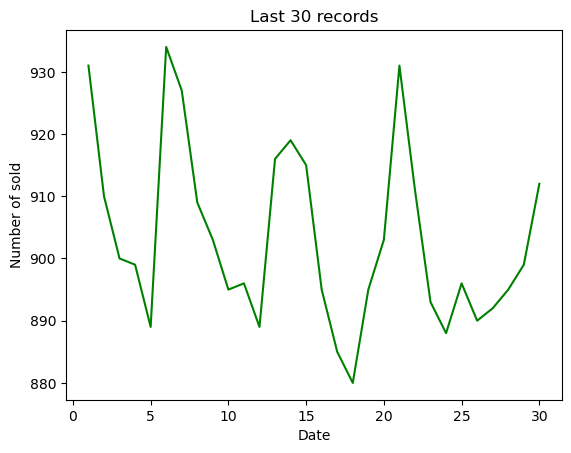

In [13]:
plt.plot(range(1,31),df.number_sold[-30:],'green')
plt.xlabel('Date')
plt.ylabel('Number of sold')
plt.title('Last 30 records')
plt.show()

Plots showcase various features like seasonality and long term trends

Finding outliers:

In [14]:
# Calculate the Z-score for each value in the DataFrame
temp_df = df[['store','product','number_sold']]
z_scores = np.abs(stats.zscore(temp_df))

# Identify columns where any Z-score is greater than 3
outliers = (z_scores > 3).any(axis=0)

# Print the columns with potential outliers
print(f"Columns with potential outliers: {temp_df.columns[outliers]}")

Columns with potential outliers: Index([], dtype='object')


Test set analysis:

In [15]:
# Load the test file
try:
    df_test = Read_file('test.csv')
except Exception : 
    print('Something went wrong when reading the test.csv file!')

In [16]:
df_test.head(10)

,Date,store,product,number_sold
0,2019-01-01,0,0,845
1,2019-01-02,0,0,851
2,2019-01-03,0,0,840
3,2019-01-04,0,0,842
4,2019-01-05,0,0,845
5,2019-01-06,0,0,855
6,2019-01-07,0,0,822
7,2019-01-08,0,0,850
8,2019-01-09,0,0,868
9,2019-01-10,0,0,849


In [17]:
df_test.tail(10)

,Date,store,product,number_sold
25540,2019-12-22,6,9,930
25541,2019-12-23,6,9,906
25542,2019-12-24,6,9,879
25543,2019-12-25,6,9,897
25544,2019-12-26,6,9,881
25545,2019-12-27,6,9,901
25546,2019-12-28,6,9,926
25547,2019-12-29,6,9,913
25548,2019-12-30,6,9,899
25549,2019-12-31,6,9,886


Test set is also daily and sorted

In [18]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25550 entries, 0 to 25549
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         25550 non-null  object
 1   store        25550 non-null  int64 
 2   product      25550 non-null  int64 
 3   number_sold  25550 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 798.6+ KB


In [19]:
df_test.describe()

,store,product,number_sold
count,25550.000000,25550.000000,25550.000000
mean,3.000000,4.500000,790.050802
std,2.000039,2.872338,211.923573
min,0.000000,0.000000,234.000000
25%,1.000000,2.000000,722.000000
50%,3.000000,4.500000,852.000000
75%,5.000000,7.000000,933.000000
max,6.000000,9.000000,1110.000000


In [20]:
df_test.isnull().sum() # Total number of null values

Date           0
store          0
product        0
number_sold    0
dtype: int64

In [21]:
df_test.duplicated().sum() # Total number of duplicated values

0

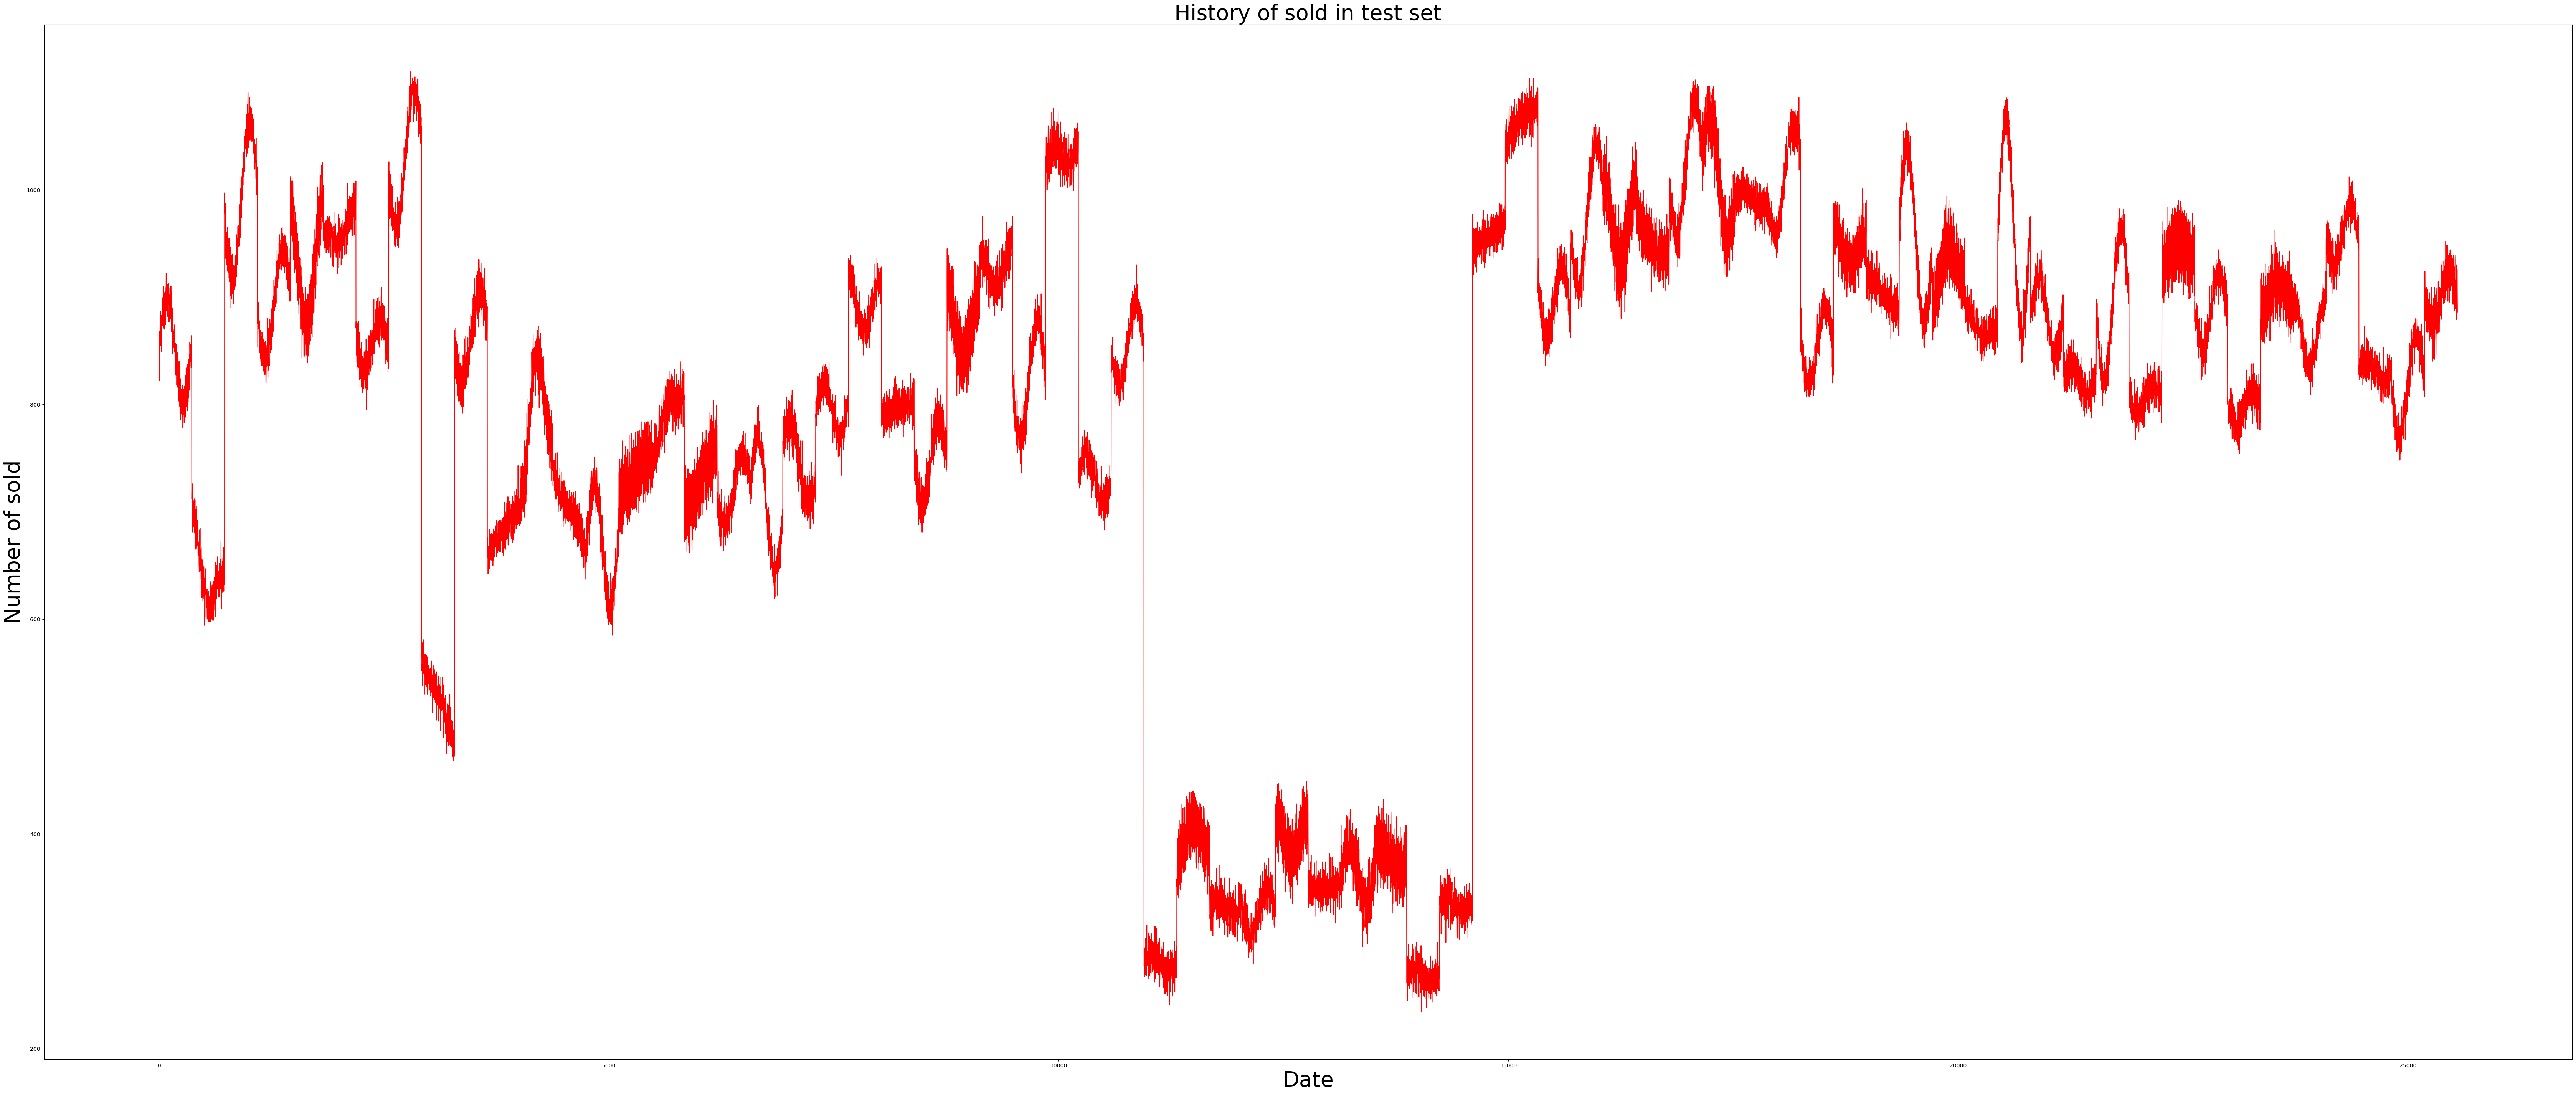

In [22]:
plt.figure(figsize=(85,35))
plt.plot(range(len(df_test)),df_test.number_sold,'red')
plt.xlabel('Date',fontdict={'size':40})
plt.ylabel('Number of sold',fontdict={'size':40})
plt.title('History of sold in test set',fontdict={'size':40})
plt.show()

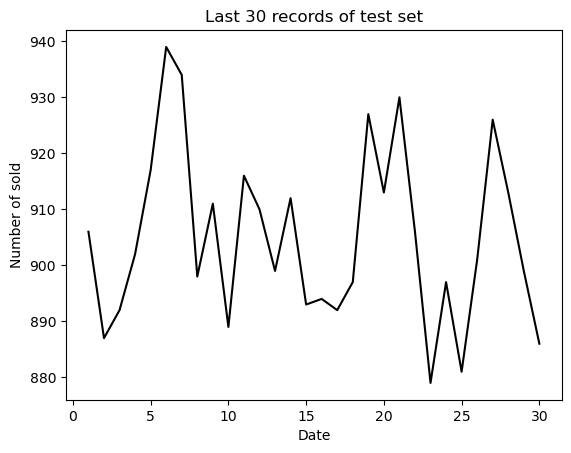

In [23]:
plt.plot(range(1,31),df_test.number_sold[-30:],'black')
plt.xlabel('Date')
plt.ylabel('Number of sold')
plt.title('Last 30 records of test set')
plt.show()

Like train set we can see Seasonality and long term trends in test set too

________________________________________________

## Part 2

### Dataset creation

Objective: Creating a Dataset from the number_sold Column

 To create a dataset from the raw number_sold data in the training set, I implemented a custom Python function. This function takes two inputs: the data and a window size. It then breaks the raw data into sequential samples based on the specified window size.

Let’s visualize this with a simple example:
If your dataset contains 10 values and you use a window size of 2, the function will generate the following sample pairs:

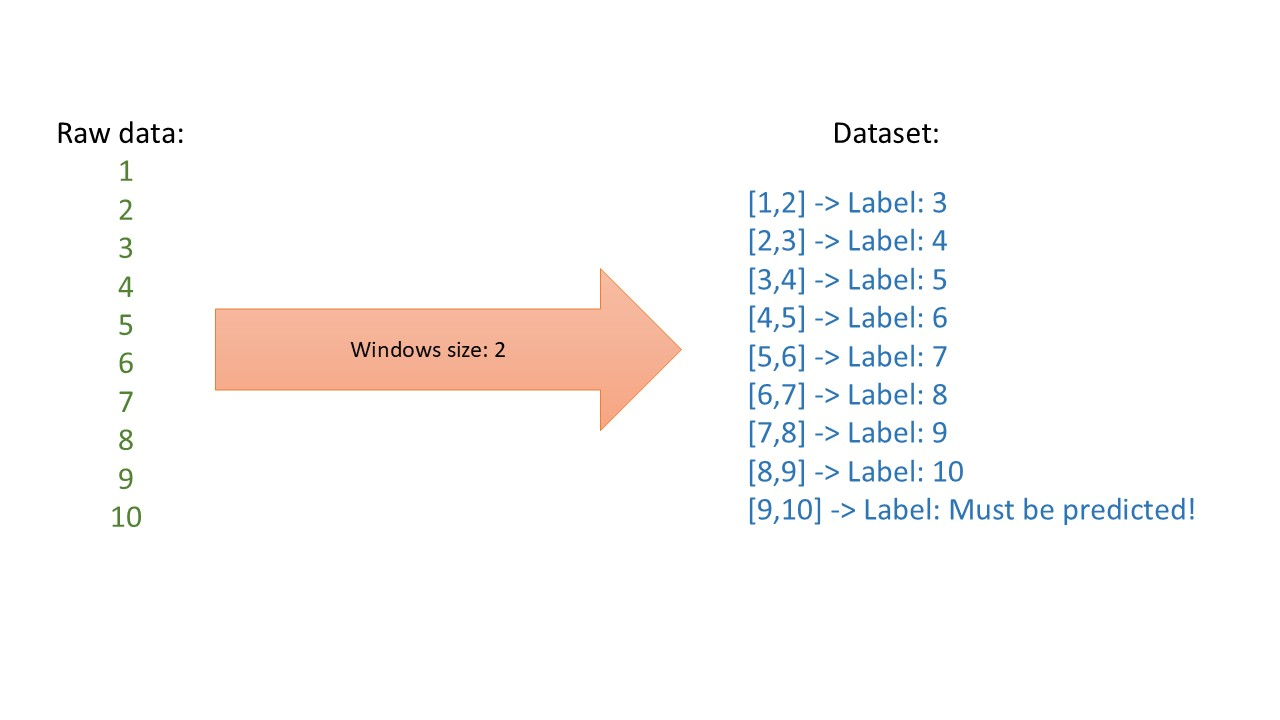

This approach transforms the time series into meaningful sequences for training.

We’re constructing the training dataset using 230,090 data points and a window size of 30.
This results in:

* 230,060 samples

* 30 features per sample

* 230,060 corresponding labels

Because the data is collected daily, each sample effectively represents a month of sales activity.

In [24]:
def Make_dataset(Range, windows_size) -> list:
    '''
    Generates a dataset of input sequences and corresponding labels using a sliding window approach.

    Parameters:
    Range (list): The full list of data points to generate sequences from.
    windows_size (int): The size of the initial window for creating input sequences.

    Returns:
    list: A tuple containing two lists:
        - result: A list of sequences (subsets of Range).
        - labels: A list of labels corresponding to the next value after each sequence.
    '''
    result = []
    labels = []

    # Loop through the Range to generate input-output pairs
    for i in range(len(Range)):
        # If windows_size is exactly one less than the length of Range,
        # collect the final sequence and label, then exit early
        if windows_size == len(Range)-1:
            result.append(Range[i:windows_size])         # Sequence window
            labels.append([Range[windows_size]])          # Next value as label
            return result, labels

        result.append(Range[i:windows_size])              # Append sequence window
        labels.append([Range[windows_size]])              # Append next value as label
        windows_size += 1                                 # Increase window end index


In [25]:
x,y = Make_dataset(df.number_sold.to_list(),30) # Generate features and labels from train set

In [26]:
x = pd.DataFrame(x) # Convert features to a data frame

In [27]:
y = pd.DataFrame(y,columns=['Target']) # Convert labels to a data frame

In [28]:
Final_df = pd.concat([x,y],axis=1) # Create an unique data frame from features and labels

In [29]:
print('The generated dataset is something like this:')
Final_df.tail()

The generated dataset is something like this:


,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,Target
230055,901,905,906,920,914,931,910,900,899,889,...,885,880,895,903,931,911,893,888,896,890
230056,905,906,920,914,931,910,900,899,889,934,...,880,895,903,931,911,893,888,896,890,892
230057,906,920,914,931,910,900,899,889,934,927,...,895,903,931,911,893,888,896,890,892,895
230058,920,914,931,910,900,899,889,934,927,909,...,903,931,911,893,888,896,890,892,895,899
230059,914,931,910,900,899,889,934,927,909,903,...,931,911,893,888,896,890,892,895,899,912


In [30]:
Final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230060 entries, 0 to 230059
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   0       230060 non-null  int64
 1   1       230060 non-null  int64
 2   2       230060 non-null  int64
 3   3       230060 non-null  int64
 4   4       230060 non-null  int64
 5   5       230060 non-null  int64
 6   6       230060 non-null  int64
 7   7       230060 non-null  int64
 8   8       230060 non-null  int64
 9   9       230060 non-null  int64
 10  10      230060 non-null  int64
 11  11      230060 non-null  int64
 12  12      230060 non-null  int64
 13  13      230060 non-null  int64
 14  14      230060 non-null  int64
 15  15      230060 non-null  int64
 16  16      230060 non-null  int64
 17  17      230060 non-null  int64
 18  18      230060 non-null  int64
 19  19      230060 non-null  int64
 20  20      230060 non-null  int64
 21  21      230060 non-null  int64
 22  22      230060 non-n

______________________________________

## Part 3

### Modeling and evaluation

In [44]:
# Create simple fully connected dense layers model using Tensorflow
model = Sequential([Dense(8,activation='relu',input_shape=(30,)),
                    Dense(8,activation='relu'),
                    Dense(1)])

# Compile the model
model.compile(optimizer='rmsprop',
              loss='mae',
              metrics=['mape'])

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │             248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 329 (1.29 KB)

 Trainable params: 329 (1.29 KB)

 Non-trainable params: 0 (0.00 B)

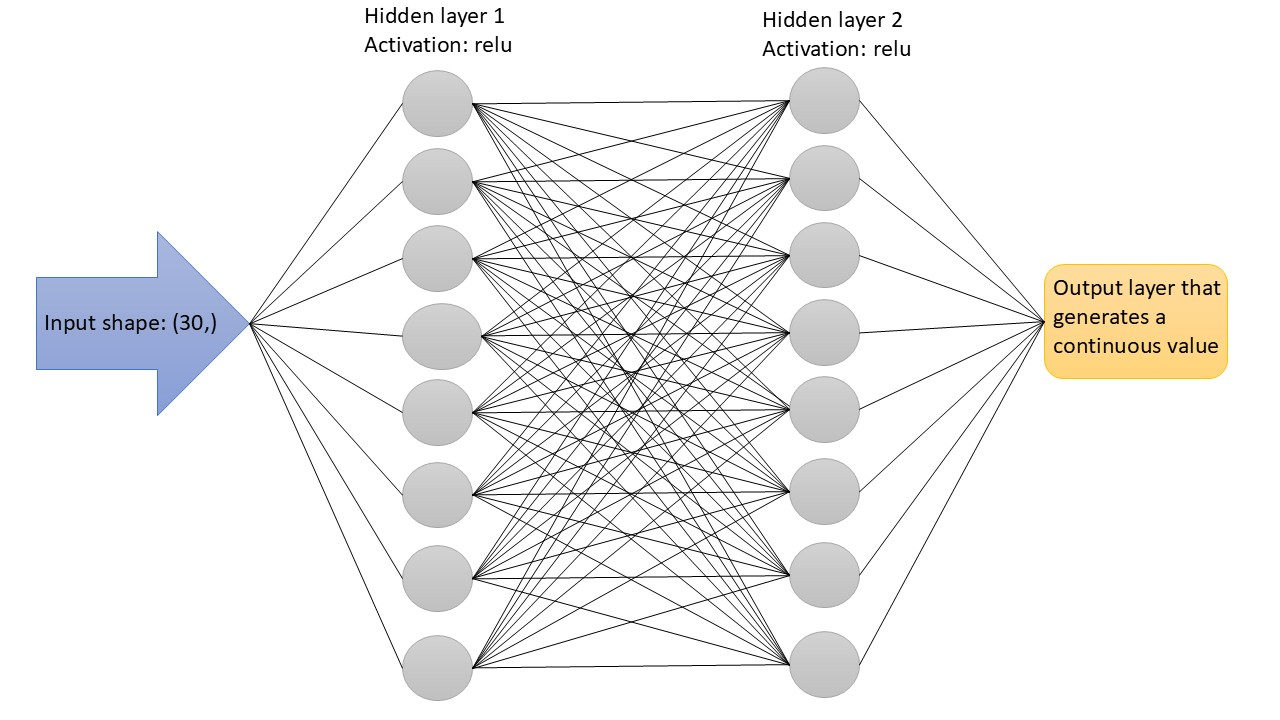

In [33]:
history = model.fit(x,y,epochs=5) # Data train

Epoch 1/5
7190/7190 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 58.6802 - mape: 7.6232
Epoch 2/5
7190/7190 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 11.1514 - mape: 1.5622
Epoch 3/5
7190/7190 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 10.7629 - mape: 1.5139
Epoch 4/5
7190/7190 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 10.5055 - mape: 1.4778
Epoch 5/5
7190/7190 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 10.1720 - mape: 1.4367


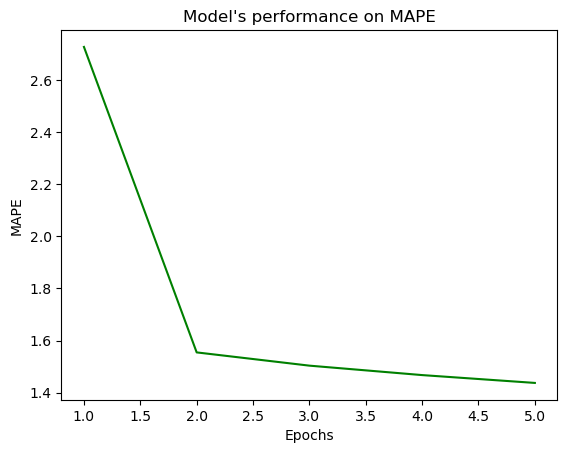

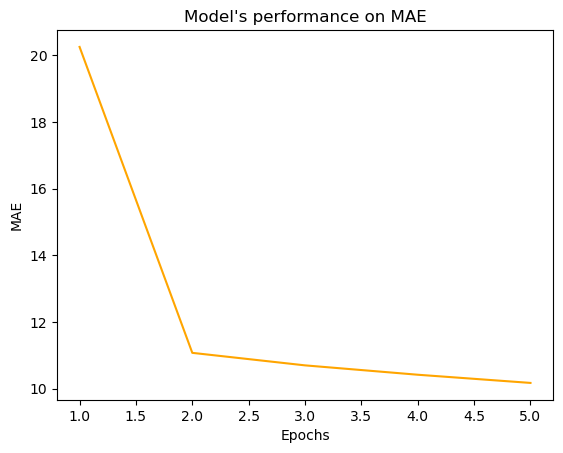

In [34]:
#Visualize model's performance.
epoch = range(1,len(history.epoch)+1)
results = history.history
plt.plot(epoch,results['mape'],'green')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.title("Model's performance on MAPE")
plt.show()
plt.plot(epoch,results['loss'],'orange')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title("Model's performance on MAE")
plt.show()

The test set contains 25,550 samples. To predict values for all of them using a window-based approach, we need additional context. Therefore, we prepend the test set with the last 30 samples from the training set. This ensures the first window in the test set has the necessary data to generate predictions.

In [35]:
# Add last 30 rows of train data to top of the test data
test_sold = df_test.number_sold.to_list()
idx = 0
for i in df.number_sold[-30:]:
    test_sold.insert(idx,i)
    idx+=1

In [36]:
x_test,y_test = Make_dataset(test_sold,30) # Make a dataset from test data by windows size 30

In [37]:
print(f'Size of test set after manipulation: {len(x_test)}')

Size of test set after manipulation: 25550


In [38]:
# Convert features and label to Numpy arrays
x_test = np.array(x_test)
y_test = np.array(y_test)

In [39]:
predicts = model.predict(x_test) # Predict the test sequences

799/799 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [40]:
print(f'MAE on test set: {MAE(df_test.number_sold,predicts.ravel()).numpy()}')

MAE on test set: 11.79604721069336


In [41]:
print(f'MAPE on test set: {MAPE(df_test.number_sold,predicts.ravel()).numpy()}')

MAPE on test set: 1.6930246353149414


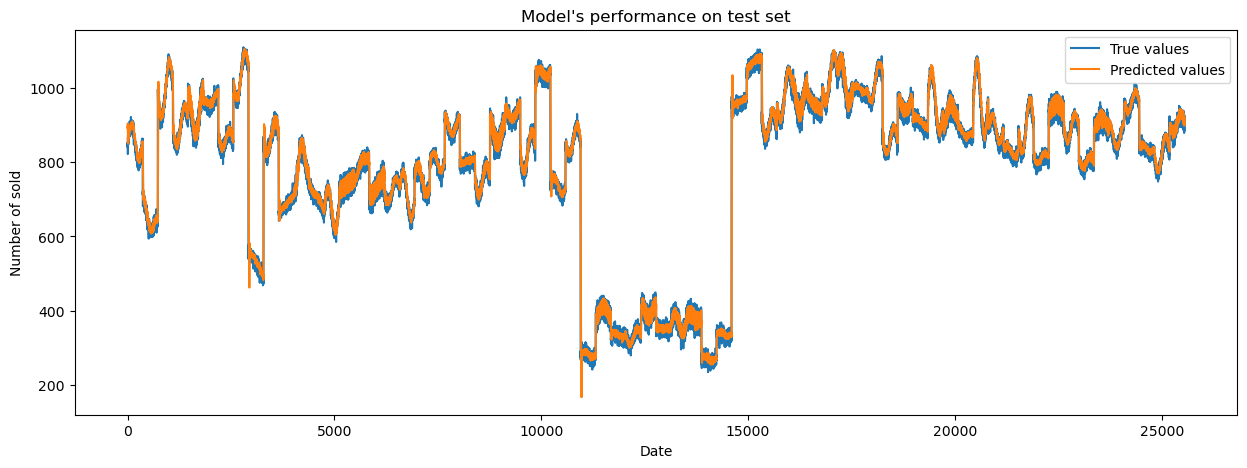

In [42]:
plt.figure(figsize=(15,5))
plt.plot(range(len(df_test)),df_test.number_sold)
plt.plot(range(len(df_test)),predicts.ravel())
plt.xlabel('Date')
plt.ylabel('Number of sold')
plt.legend(['True values','Predicted values'])
plt.title("Model's performance on test set")
plt.show()

In [43]:
save_model(model,'Model.keras') # Store the model

# End